In [5]:
#import libraries
import numpy as np #numerical python/mathematical operations
import pandas as pd # reading datasets/manipulating
import matplotlib.pyplot as plt # graphical representation 2D;pyplot is function in matplotlib
import seaborn as sns# advance version of matplotlib

In [6]:
#reading dataset;we use pandas lib and function read_csv
df =pd.read_csv("https://raw.githubusercontent.com/mubeen161/Health-Insurance-Cost-Prediction/main/insurance.csv")

In [7]:
df

,Age,Gender,BMI,Children,Smoker,Region,Charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,NaN,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3.0,no,northwest,10600.54830
1334,18,female,31.920,0.0,no,northeast,2205.98080
1335,18,female,36.850,0.0,no,southeast,1629.83350
1336,21,female,25.800,NaN,no,southwest,2007.94500


In [8]:
df.shape

(1338, 7)

In [9]:
#head generally gives the first 5 rows and a parameter(no.) inside it will give that no. of rows
df.head()

,Age,Gender,BMI,Children,Smoker,Region,Charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,NaN,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520


In [10]:
df.head(3)

,Age,Gender,BMI,Children,Smoker,Region,Charges
0,19,female,27.90,0.0,yes,southwest,16884.9240
1,18,male,33.77,1.0,no,southeast,1725.5523
2,28,male,33.00,NaN,no,southeast,4449.4620


In [11]:
df.tail()

,Age,Gender,BMI,Children,Smoker,Region,Charges
1333,50,male,30.97,3.0,no,northwest,10600.5483
1334,18,female,31.92,0.0,no,northeast,2205.9808
1335,18,female,36.85,0.0,no,southeast,1629.8335
1336,21,female,25.80,NaN,no,southwest,2007.9450
1337,61,female,29.07,0.0,yes,northwest,29141.3603


In [12]:
## shows the columns
df.columns

Index(['Age', 'Gender', 'BMI', 'Children', 'Smoker', 'Region', 'Charges'], dtype='object')

In [13]:

df.describe()

,Age,BMI,Children,Charges
count,1338.000000,1338.000000,1295.000000,1338.000000
mean,39.207025,30.663397,1.097297,13270.422265
std,14.049960,6.098187,1.208465,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
#prints information about columns, null values and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1338 non-null   int64  
 1   Gender    1338 non-null   object 
 2   BMI       1338 non-null   float64
 3   Children  1295 non-null   float64
 4   Smoker    1338 non-null   object 
 5   Region    1338 non-null   object 
 6   Charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [15]:
#gives the sum of null values
df.isnull().sum()

Age          0
Gender       0
BMI          0
Children    43
Smoker       0
Region       0
Charges      0
dtype: int64

In [16]:
#gives the mean for the requested axis
df["Children"].mean()

1.0972972972972972

In [17]:
#filling the null values
df["Children"]=df["Children"].fillna(1)

In [18]:
#null values are removed
df.isnull().sum()

Age         0
Gender      0
BMI         0
Children    0
Smoker      0
Region      0
Charges     0
dtype: int64

Text(0.5, 1.0, 'Gender Distribution')

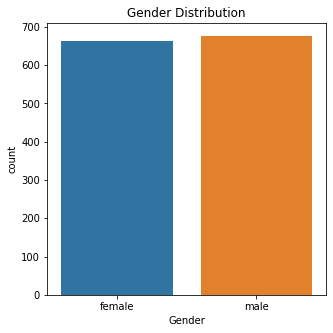

In [19]:
##plotting the graph of gender distribution using sns lib
plt.figure(figsize=(5,5))
sns.countplot(x='Gender',data=df)
plt.title('Gender Distribution')

Text(0.5, 1.0, 'Smoker Distribution')

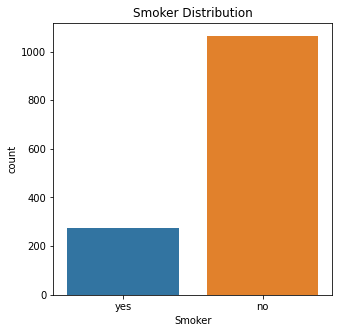

In [20]:
plt.figure(figsize=(5,5))
sns.countplot(x='Smoker',data=df)
plt.title('Smoker Distribution')

Text(0.5, 1.0, 'Region Distribution')

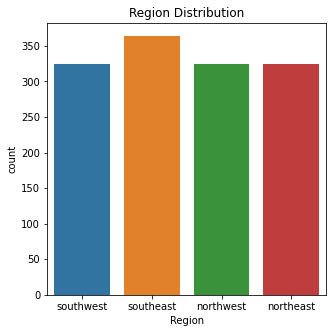

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(x='Region',data=df)
plt.title('Region Distribution')

Text(0.5, 1.0, 'Cost vs Region')

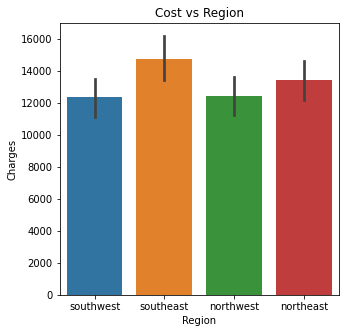

In [22]:

plt.figure(figsize=(5,5))
sns.barplot(x='Region',y='Charges',data=df)
plt.title('Cost vs Region')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c27087d30>,
      dtype=object)

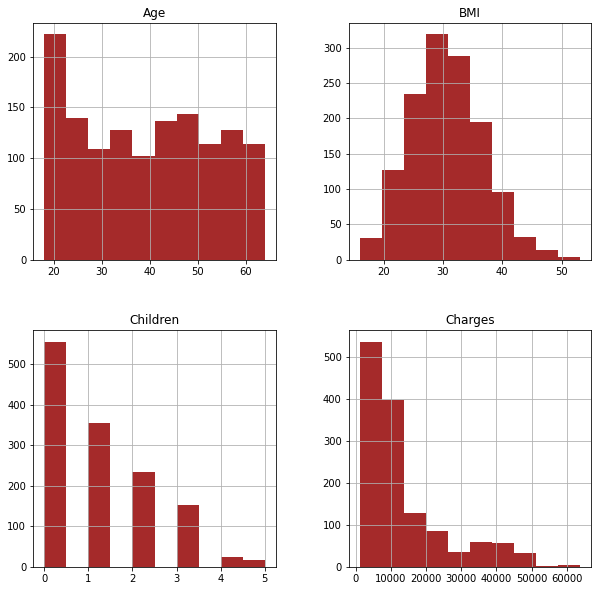

In [23]:
#plotting histogram
df[['Age','BMI','Children','Charges']].hist(figsize=(10,10),color='brown')

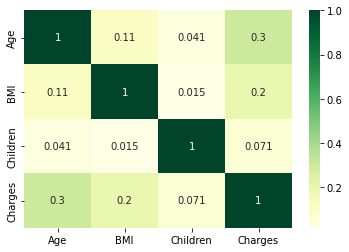

In [24]:
#determining the correlation using heatmap (1-no correlation; 0.3-max correlation) 
sns.heatmap(df.corr(),cmap='YlGn',annot=True)

In [25]:
from sklearn.model_selection import train_test_split #Splitting arrays  into random train and test subsets.
from sklearn.linear_model import LinearRegression # gives the approximate value of the predicted value
from sklearn import metrics #representation of the accuracy of predictions.

In [26]:
#replacing the categorical values with the numerical values for  linear regression

#encoding gender column
df.replace({'Gender':{'male':0,'female':1}},inplace=True)
#encoding smoker column
df.replace({'Smoker':{'yes':0,'no':1}},inplace=True)
#encoding Region column
df.replace({'Region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)


In [27]:

x=df.drop(columns='Charges',axis=1)
y=df['Charges']


In [28]:

print(x)
#printing the x values where charges are dropped

      Age  Gender     BMI  Children  Smoker  Region
0      19       1  27.900       0.0       0       1
1      18       0  33.770       1.0       1       0
2      28       0  33.000       1.0       1       0
3      33       0  22.705       0.0       1       3
4      32       0  28.880       0.0       1       3
...   ...     ...     ...       ...     ...     ...
1333   50       0  30.970       3.0       1       3
1334   18       1  31.920       0.0       1       2
1335   18       1  36.850       0.0       1       0
1336   21       1  25.800       1.0       1       1
1337   61       1  29.070       0.0       0       3

[1338 rows x 6 columns]


In [29]:
#printing charges
print(y)


0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: Charges, Length: 1338, dtype: float64


In [30]:
#dividing training and testing data 
x_train , x_test, y_train, y_test=train_test_split(x,y,test_size=0.2) #(training=80%,testing=20%)

In [31]:
#shaping the data according to the given percentages
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [32]:
reg=LinearRegression()

In [33]:
reg.fit(x_train,y_train)

LinearRegression()

In [34]:
training_data_prediction=reg.predict(x_train)

In [35]:
# Using R squared method for training and testing data;R squared method is used to check the accuracy of the prediction
r_train=metrics.r2_score(y_train,training_data_prediction)
print('R squared value for Training Data',r_train)

R squared value for Training Data 0.7440658543287277


In [36]:
test_predict=reg.predict(x_test)


In [37]:
#R squared value
r1_test=metrics.r2_score(y_test,test_predict)
print('R squared value for Testing Data',r1_test)

R squared value for Testing Data 0.7724691045321582


In [40]:
#giving input values according to the columns to calculate the Health Insurance 
input_data=(13,1,25.74,0,0,0)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction= reg.predict(input_data_reshaped)
print('The insurance cost is: ',prediction[0])

The insurance cost is:  22406.152385081896


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
